## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

##### 1. Random Choose Method to get optimal k* and *b

In [43]:
%matplotlib inline
import random

In [48]:
from sklearn.datasets import load_boston
data = load_boston()
x, y = data['data'], data['target']
# 房间数量
x_rm = x[:, 5]

In [50]:
def draw_rm_price() : 
    plt.scatter(x[:, 5], y)
    
def price(rm, k, b) : 
    return k * rm + b

def loss(y, y_hat) : 
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [59]:
# 1. Random Choose Method to get optimal k* and *b
def gen_best_by_random(try_times) : 
    """随机生成k、b，获取最接近的k、 b"""
    min_loss = float('inf')
    best_k, best_b = None, None
    for i in range(try_times) : 
        k = random.randint(-100, 100)
        b = random.randint(-100, 100)
        price_rm = [price(rm, k, b) for rm in x_rm]

        current_loss = loss(y, price_rm)
        if current_loss < min_loss : 
            min_loss = current_loss
            best_k = k
            best_b = b
#             print("times {}, min loss {}, best k {}, best b {}".format(i, min_loss, best_k, best_b))
            
    print("min loss {}, best k {}, best b {}".format(min_loss, best_k, best_b))

    best_price_rm = [price(rm, best_k, best_b) for rm in x_rm]
    draw_rm_price()
    plt.scatter(x_rm, best_price_rm)

min loss 43.6065241245059, best k 9, best b -34


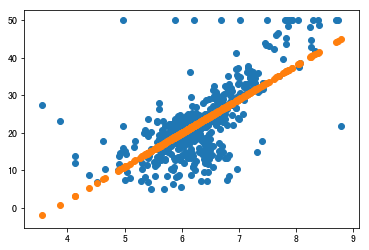

In [60]:
gen_best_by_random(100000)

##### 2.Supervised Direction to get optimal k* and *b

In [61]:
def gen_best_by_supervised(try_times) : 
    """控制变化方向 k、b的正负影响着误差的变化"""
    min_loss = float('inf')
    best_k, best_b = None, None
    
    """初始化一组k、b"""
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    """变化方向 分别为 k、b的变化方向"""
    direction = [
        (+1, +1),
        (+1, -1),
        (-1, +1),
        (-1, -1)
    ]
    scanner = 0.1
    
    next_direction = random.choice(direction)
    for i in range(try_times) : 
        k_direction, b_direction = next_direction
        
        if best_k == None : best_k = k
        if best_b == None : best_b = b
        
        current_k, current_b = best_k + k_direction * scanner, best_b + b_direction * scanner
        price_rm = [price(rm, current_k, current_b) for rm in x_rm]

        current_loss = loss(y, price_rm)
        if current_loss < min_loss : 
            min_loss = current_loss
            best_k, best_b = current_k, current_b
            next_direction = next_direction
#             print("times {}, min loss {}, best k {}, best b {}".format(i, min_loss, best_k, best_b))
        else : 
            next_direction = random.choice(list(set(direction) - {next_direction}))

    print("min loss {}, best k {}, best b {}".format(min_loss, best_k, best_b))
    
    best_price_rm = [price(rm, best_k, best_b) for rm in x_rm]
    draw_rm_price()
    plt.scatter(x_rm, best_price_rm)

min loss 44.41802604398267, best k 7.886029045198331, best b -26.729922886162743


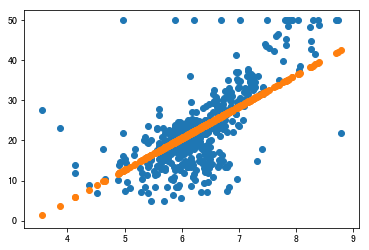

In [63]:
gen_best_by_supervised(100000)

##### 3.Gradient Descent to get optimal k* and *b

* 梯度下降 ：怎么找到最低点？
$$ loss() = sum((y - hat(y))^2) / n $$
    

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

##### 4. Try different Loss function and learning rate.

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: 复杂的公式需要大量的工作，而且涵盖不全，而机器学习可以在已有基础上进行调整，更灵活。

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: 计算量大，而且 k、b每次都是随机量，无法预知变化方向，所有结果都是未知的，可能最优的结果并非最好的结果。

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans: 相较于方法一，方法二通过控制变化方向，使误差能够朝指点变化方向持续变化，如果发现不对能够调整变化方向，而方法一整个过程都是不可控的随机的误差很大。方法二的缺点是仍然需要大量的计算、方向也不能保证一直在朝好的方向变化。

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:

###### 7. Using the simple words to describe: What's the machine leanring.

Ans: 通过大量数据、重复运算，使计算机在运算过程中不断接近预期值并做到普遍适用，而且后续根据数据变化可以进行调整。

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

In [64]:
# 安装 Beautiful Soup
!pip install beautifulsoup4

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


In [65]:
# 北京地铁1号线 北京地铁1号线车站列表/北京地铁1号线首末车时刻表
# 北京地铁2号线 北京地铁2号线车站列表/北京地铁2号线首末车时间表
# 北京地铁4号线 北京地铁4号线车站列表/北京地铁4号线首末班车时刻表
# 北京地铁5号线 北京地铁5号线车站列表/5号线首末车时刻表
# 北京地铁6号线 北京地铁6号线车站列表/6号线首末车时刻表
# 北京地铁7号线 北京地铁7号线车站列表/7号线首末车时刻表
# 北京地铁8号线（北段）北京地铁8号线车站列表/北京地铁8号线（北段）首末车时刻表
# 北京地铁8号线（南段）北京地铁8号线车站列表/北京地铁8号线（南段）首末车时刻表
# 北京地铁9号线 北京地铁9号线车站列表/9号线首末车时刻表
# 北京地铁10号线 北京地铁10号线车站列表/10号线首末车时刻表
# 北京地铁13号线 车站列表/13号线首末车时刻表
# 北京地铁14号线（西段）北京地铁14号线车站列表/14号线（西段）首末车时刻表
# 北京地铁14号线（东段）北京地铁14号线车站列表/14号线东段（含中段）首末车时刻表
# 北京地铁15号线 北京地铁15号线车站列表/北京地铁15号线首末车时刻表
# 北京地铁16号线 车站列表/首末车时间
# 北京地铁八通线 北京地铁八通线车站列表/八通线首末车时刻表
# 北京地铁昌平线 北京地铁昌平线车站列表/昌平线首末车时刻表
# 北京地铁亦庄线 车站信息
# 北京地铁房山线 北京地铁房山线车站列表/房山线首末车时刻表
# 北京地铁S1线 车站列表/北京地铁S1线首末车时刻表
# 北京地铁燕房线 车站列表/运营时刻

In [82]:
# spider
import requests
from bs4 import BeautifulSoup
import re
import networkx as nx
import matplotlib.pyplot as plt

#站点类 
class Station :
    """
    name : 站点名
    line_lable : 所属线
    next_stations : 连接的站点
    """
    def __init__(self, name="", line_lable="", next_stations = []):
        self.name, self.line_lable, self.next_stations = name, line_lable, next_stations
        
    def setName(self, name="") : self.name = name
    def getName(self) : return self.name

    def setLineLable(self, line_lable="") : self.line_lable = line_lable
    def getLineLable(self) : return self.line_lable 
    
    def setNextStations(self, next_stations = []) : self.next_stations = next_stations
    def getNextStations(self) : return self.next_stations    
    
    def to_str(self) : 
        return "name = " + self.name + ",line_lable = " + self.line_lable + ",next_stations = " + str(self.next_stations)
    
# 请求头
def headers() : 
    header = {
     "User-Agent": "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.89 "
     "Safari/537.36"
     }
    return header

# 站点url
def source() : 
    return 'https://baike.baidu.com'

# 详情url
def contact_item(item) : 
    return source() + item

# 爬取源码
def spider(url, encode) : 
    header = headers()
    res = requests.get(url,  headers=header)
    res.encoding = encode
    soup = BeautifulSoup(res.text)
    return soup

# 地铁线 + 链接
def line_and_href(tables) : 
    lfs = {}
    for t in tables : 
        tds = t.find_all('td')
        for td in tds : 
            if re.findall(r'北京地铁.*线', str(td)) : 
                lfs[td.get_text()] = td.a.get('href')
    return lfs

# 获取所有地铁线及链接
def all_lfs(soup) : 
    tables = soup.find_all('table')
    pat = r"<tr><th.*>线路</th><th.*>起止点</th><th.*>首班</th><th>末班</th></tr><tr>"
    mts = [t for t in tables if re.findall(pat, str(t))]
    lfs = line_and_href(mts)
    return lfs

def stations(lfs) : 
    # 地铁路线
    lines = {}
    
    for k, v in lfs.items() : 
        preferred_pat = r"" + str(k[4:] + ".{0,6}首末班?车时[刻|间]表?").replace('(', '\(?').replace('（', '（?').replace(')', '\)?').replace('）', '）?')
        print("spider " + k)
        optional_pat = r"车站信息"
        special_pat = r"<tr><th.*>车?站?编号</th><th.*>车站名称.*</th>.*<tr>"
        soup = spider(contact_item(v), 'utf-8')
        tables = soup.find_all('table')
        
        tagets = [tab for tab in tables if re.findall(preferred_pat, str(tab))]
        if  len(tagets) > 0 :
            print(preferred_pat)
            trs = tagets[0].find_all('tr')
            stations = [list(tr.children)[0].get_text() for tr in trs[1:] if list(tr.children) and (not re.findall(r"参考|车站|时间|方向|全程|(备?注)|(\d{4}年\d{1,2}月)", str(tr)))]
            if re.findall(r"内|外环", str(trs[0])) : 
                print("环线")
                stations.append(stations[0])
            lines[k] = stations
            continue
            
        tagets = [tab for tab in tables if re.findall(optional_pat, str(tab))]
        if  len(tagets) > 0 : 
            print(optional_pat)
            trs = tagets[0].find_all('tr')
            stations = [list(tr.children)[1].get_text().replace("\n", "") for tr in trs[1:] if list(tr.children) and (not re.findall(r"参考|时间|方向|全程|(备?注)|(\d{4}年\d{1,2}月)", str(tr)))]
            if re.findall(r"内|外环", str(trs[0])) : 
                print("环线")
                stations.append(stations[0])
            lines[k] = stations
            continue
            
        tagets = [tab for tab in tables if re.findall(special_pat, str(tab))]
        if  len(tagets) > 0 : 
            print(special_pat)
            trs = tagets[0].find_all('tr')
            stations = [list(tr.children)[1].get_text().replace("\n", "") for tr in trs[1:] if list(tr.children) and (not re.findall(r"参考|时间|方向|全程|(备?注)", str(tr)))]
            if re.findall(r"[内外]环", str(trs[0])) : 
                print("环线")
                stations.append(stations[0])
            lines[k] = stations
            continue     

    return lines
            
# 生成地铁图
def create_line_graph(lines) : 
    gragh = {}
    # 生成所有站点信息    
    for line_lable,stations in lines.items() : 
        for station in stations : 
            s = Station(name=station, line_lable=line_lable, next_stations = [])
            if not station in gragh : 
                gragh[station] = s
    
    # 关联所有相邻站点
    for line_lable,stations in lines.items() : 
        for i, station in enumerate(stations) : 
            current_ = gragh[station]
            if i != 0 or i != len(stations) - 1 : 
                if i - 1 >= 0 : 
                    pre_station = stations[i - 1]
                    current_.setNextStations(current_.getNextStations() + [pre_station])
                
                if i + 1 <= len(stations) - 1 : 
                    next_station = stations[i + 1]
                    current_.setNextStations(current_.getNextStations() + [next_station])

    return gragh        

# 路线查询
def search(start, destination, gragh):
    pathes = [[start]]
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]

        if froninter in visitied: continue
            
        successors = gragh[froninter].getNextStations()
        
        for station in successors:
            if station in path: continue  # eliminate loop
                
            new_path = path + [station]
            
            pathes.append(new_path)
            
            if station == destination: return new_path
        
        visitied.add(froninter)

# 打印路线
def print_line(line, graph) : 
    print(" ---> ".join([station + "🚇(" + graph[station].getLineLable() + ")" for station in line]))

In [67]:
soup = spider(contact_item('/item/北京地铁/408485'), 'utf-8')

In [68]:
lfs = all_lfs(soup)

In [69]:
lines = stations(lfs)

spider 北京地铁1号线
1号线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁2号线
2号线.{0,6}首末班?车时[刻|间]表?
环线
spider 北京地铁4号线
4号线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁5号线
5号线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁6号线
6号线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁7号线
7号线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁8号线（北段）
8号线（?北段）?.{0,6}首末班?车时[刻|间]表?
spider 北京地铁8号线（南段）
8号线（?南段）?.{0,6}首末班?车时[刻|间]表?
spider 北京地铁9号线
9号线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁10号线
10号线.{0,6}首末班?车时[刻|间]表?
环线
spider 北京地铁13号线
13号线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁14号线（西段）
14号线（?西段）?.{0,6}首末班?车时[刻|间]表?
spider 北京地铁14号线（东段）
14号线（?东段）?.{0,6}首末班?车时[刻|间]表?
spider 北京地铁15号线
15号线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁16号线
<tr><th.*>车?站?编号</th><th.*>车站名称.*</th>.*<tr>
spider 北京地铁八通线
八通线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁昌平线
昌平线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁亦庄线
车站信息
spider 北京地铁房山线
房山线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁S1线
S1线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁燕房线
<tr><th.*>车?站?编号</th><th.*>车站名称.*</th>.*<tr>


In [70]:
lines

{'北京地铁1号线': ['苹果园',
  '古城',
  '八角游乐园',
  '八宝山',
  '玉泉路',
  '五棵松',
  '万寿路',
  '公主坟',
  '军事博物馆',
  '木樨地',
  '南礼士路',
  '复兴门',
  '西单',
  '天安门西',
  '天安门东',
  '王府井',
  '东单',
  '建国门',
  '永安里',
  '国贸',
  '大望路',
  '四惠',
  '四惠东'],
 '北京地铁2号线': ['西直门',
  '积水潭',
  '鼓楼大街',
  '安定门',
  '雍和宫',
  '东直门',
  '东四十条',
  '朝阳门',
  '建国门',
  '北京站',
  '崇文门',
  '前门',
  '和平门',
  '宣武门',
  '长椿街',
  '复兴门',
  '阜成门',
  '车公庄',
  '西直门'],
 '北京地铁4号线': ['安河桥北',
  '北宫门',
  '西苑',
  '圆明园',
  '北京大学东门',
  '中关村',
  '海淀黄庄',
  '人民大学',
  '魏公村',
  '国家图书馆',
  '动物园',
  '西直门',
  '新街口',
  '平安里',
  '西四',
  '灵境胡同',
  '西单',
  '宣武门',
  '菜市口',
  '陶然亭',
  '北京南站',
  '马家堡',
  '角门西',
  '公益西桥'],
 '北京地铁5号线': ['宋家庄',
  '刘家窑',
  '蒲黄榆',
  '天坛东门',
  '磁器口',
  '崇文门',
  '东单',
  '灯市口',
  '东四',
  '张自忠路',
  '北新桥',
  '雍和宫',
  '和平里北街',
  '和平西桥',
  '惠新西街南口',
  '惠新西街北口',
  '大屯路东',
  '北苑路北',
  '立水桥南',
  '立水桥',
  '天通苑南',
  '天通苑',
  '天通苑北'],
 '北京地铁6号线': ['金安桥',
  '苹果园',
  '杨庄',
  '西黄村',
  '廖公庄',
  '田村',
  '海淀五路居',
  '慈寿寺',
  '花园桥',
  '白石桥南',
  '车公庄西',
  '车公庄',
  '平安

In [91]:
line_graph = create_line_graph(lines)

In [92]:
line_graph

{'苹果园': <__main__.Station at 0xa232a2668>,
 '古城': <__main__.Station at 0xa23296c18>,
 '八角游乐园': <__main__.Station at 0xa23296c50>,
 '八宝山': <__main__.Station at 0xa235dfba8>,
 '玉泉路': <__main__.Station at 0xa235dfd30>,
 '五棵松': <__main__.Station at 0xa235dfb70>,
 '万寿路': <__main__.Station at 0xa235dfc88>,
 '公主坟': <__main__.Station at 0xa235df9e8>,
 '军事博物馆': <__main__.Station at 0xa235dff98>,
 '木樨地': <__main__.Station at 0x1a262ee6d8>,
 '南礼士路': <__main__.Station at 0x1a262ee1d0>,
 '复兴门': <__main__.Station at 0xa23508e48>,
 '西单': <__main__.Station at 0xa23508e80>,
 '天安门西': <__main__.Station at 0xa235cd3c8>,
 '天安门东': <__main__.Station at 0x1a262a01d0>,
 '王府井': <__main__.Station at 0x1a262a0080>,
 '东单': <__main__.Station at 0x1a262a0b38>,
 '建国门': <__main__.Station at 0x1a262a0a90>,
 '永安里': <__main__.Station at 0x1a262a0898>,
 '国贸': <__main__.Station at 0x1a262a0978>,
 '大望路': <__main__.Station at 0x1a262a0c50>,
 '四惠': <__main__.Station at 0x1a262a07f0>,
 '四惠东': <__main__.Station at 0x1a262a09b0>

In [101]:
def print_line_graph(graph) : 
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    station_graph = nx.Graph()
#     station_graph.add_nodes_from(list(graph.keys()))
    for k, v in graph.items() : 
        for s in v.getNextStations() : 
            station_graph.add_edge(k, s)
    nx.draw(station_graph, with_labels = True, node_size = 10)

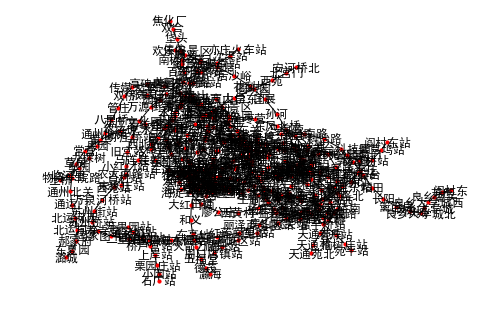

In [106]:
print_line_graph(line_graph)

In [72]:
line_graph['苹果园'].to_str()

"name = 苹果园,line_lable = 北京地铁1号线,next_stations = ['古城', '金安桥', '杨庄']"

In [73]:
line_graph['东单'].to_str()

"name = 东单,line_lable = 北京地铁1号线,next_stations = ['王府井', '建国门', '崇文门', '灯市口']"

In [74]:
line_graph['巴沟'].to_str()

"name = 巴沟,line_lable = 北京地铁10号线,next_stations = ['苏州街', '火器营']"

In [75]:
line_graph['西直门'].to_str()

"name = 西直门,line_lable = 北京地铁2号线,next_stations = ['积水潭', '车公庄', '动物园', '新街口', '明光桥西']"

In [76]:
line_graph['古城'].to_str()

"name = 古城,line_lable = 北京地铁1号线,next_stations = ['苹果园', '八角游乐园']"

In [85]:
print_line(search('苹果园', '东单', line_graph), line_graph)

苹果园🚇(北京地铁1号线) ---> 古城🚇(北京地铁1号线) ---> 八角游乐园🚇(北京地铁1号线) ---> 八宝山🚇(北京地铁1号线) ---> 玉泉路🚇(北京地铁1号线) ---> 五棵松🚇(北京地铁1号线) ---> 万寿路🚇(北京地铁1号线) ---> 公主坟🚇(北京地铁1号线) ---> 军事博物馆🚇(北京地铁1号线) ---> 木樨地🚇(北京地铁1号线) ---> 南礼士路🚇(北京地铁1号线) ---> 复兴门🚇(北京地铁1号线) ---> 西单🚇(北京地铁1号线) ---> 天安门西🚇(北京地铁1号线) ---> 天安门东🚇(北京地铁1号线) ---> 王府井🚇(北京地铁1号线) ---> 东单🚇(北京地铁1号线)


In [78]:
print_line(search('五棵松', '方庄', line_graph), line_graph)

五棵松🚇(北京地铁1号线) ---> 万寿路🚇(北京地铁1号线) ---> 公主坟🚇(北京地铁1号线) ---> 军事博物馆🚇(北京地铁1号线) ---> 北京西站🚇(北京地铁7号线) ---> 湾子🚇(北京地铁7号线) ---> 达官营🚇(北京地铁7号线) ---> 广安门内🚇(北京地铁7号线) ---> 菜市口🚇(北京地铁4号线) ---> 陶然亭🚇(北京地铁4号线) ---> 北京南站🚇(北京地铁4号线) ---> 永定门外🚇(北京地铁8号线（南段）) ---> 景泰🚇(北京地铁14号线（东段）) ---> 蒲黄榆🚇(北京地铁5号线) ---> 方庄🚇(北京地铁14号线（东段）)


##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [83]:
print_line(search('奥体中心', '天安门东', line_graph), line_graph)

奥体中心🚇(北京地铁8号线（北段）) ---> 北土城🚇(北京地铁8号线（北段）) ---> 安华桥🚇(北京地铁8号线（北段）) ---> 安德里北街🚇(北京地铁8号线（北段）) ---> 鼓楼大街🚇(北京地铁2号线) ---> 什刹海🚇(北京地铁8号线（北段）) ---> 南锣鼓巷🚇(北京地铁6号线) ---> 东四🚇(北京地铁5号线) ---> 灯市口🚇(北京地铁5号线) ---> 东单🚇(北京地铁1号线) ---> 王府井🚇(北京地铁1号线) ---> 天安门东🚇(北京地铁1号线)


In [86]:
print_line(search('西直门', '鼓楼大街', line_graph), line_graph)

西直门🚇(北京地铁2号线) ---> 积水潭🚇(北京地铁2号线) ---> 鼓楼大街🚇(北京地铁2号线)


## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

In [ ]:
def is_goal() : 
    pass

def get_successor() : 
    pass

def strategy() : 
    pass

# 路线查询
def search(start, destination, gragh):
    pathes = [[start]]
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]

        if froninter in visitied: continue
            
        successors = gragh[froninter].getNextStations()
        
        for station in successors:
            if station in path: continue  # eliminate loop
                
            new_path = path + [station]
            
            pathes.append(new_path)
            
            if station == destination: return new_path
        
        visitied.add(froninter)

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)